<a href="https://colab.research.google.com/github/rachaelssmith/CSE450/blob/master/Prove_4_Decision_Tree_Classifier_v_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Working with SkLearn Decision Trees

# import
import os
import random
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import export_text
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up Iris Data
iris_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
iris_file = ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris = pd.read_csv(iris_file, header = None, names = iris_names)



In [66]:
#randomize data
iris = iris.sample(frac=1)
iris

# split into features and targets
features = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
targets = iris[['species']]

#randomize and split the samples into two groups.
#30% of the samples will be used for testing.
#the other 70% will be used for training.
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = .30)

print ("train data shape: "+str(train_features.shape+train_targets.shape))
print ("test data shape: "+str(test_features.shape+test_targets.shape))


train data shape: (105, 4, 105, 1)
test data shape: (45, 4, 45, 1)


   Predicted Species:  Index:  Actual Species:
0     Iris-versicolor      76  Iris-versicolor
1      Iris-virginica     131   Iris-virginica
2     Iris-versicolor      55  Iris-versicolor
3      Iris-virginica     123   Iris-virginica
4         Iris-setosa      47      Iris-setosa
5      Iris-virginica     115   Iris-virginica
6         Iris-setosa       4      Iris-setosa
7      Iris-virginica     116   Iris-virginica
8         Iris-setosa       2      Iris-setosa
9         Iris-setosa      24      Iris-setosa
10    Iris-versicolor      98  Iris-versicolor
11     Iris-virginica     137   Iris-virginica
12     Iris-virginica     135   Iris-virginica
13        Iris-setosa      38      Iris-setosa
14    Iris-versicolor      63  Iris-versicolor
15     Iris-virginica     141   Iris-virginica
16    Iris-versicolor     129   Iris-virginica
17        Iris-setosa      11      Iris-setosa
18    Iris-versicolor      53  Iris-versicolor
19    Iris-versicolor      61  Iris-versicolor
20    Iris-ve

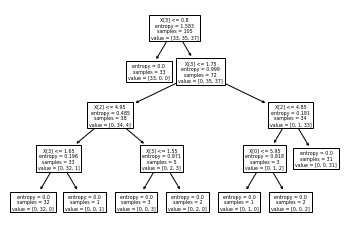

In [67]:
# Build Tree Plot
tree_clf = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
tree_clf = tree_clf.fit(train_features, train_targets)
tree_pred = tree_clf.predict(test_features)
tree.plot_tree(tree_clf)

p_dataframe = pd.DataFrame(tree_pred)
p_dataframe.rename(index=str, columns={1:'species'})
accuracy = accuracy_score(test_targets, tree_pred)
new_targets_list = test_targets
new_targets_list = new_targets_list.reset_index()
final = pd.concat([p_dataframe, new_targets_list], axis=1,join='outer',ignore_index=True)
final.columns = ['Predicted Species:', 'Index:', 'Actual Species:']
print(final)
print("")
print("Accuracy: \n\t"+format(accuracy,'.2f'))


In [68]:
r = export_text(tree_clf, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print("Export Text: \n", r)

print("Cross Validation Score: \n")
cross_val_score(tree_clf, features, targets, cv=10)

accuracy = accuracy_score(test_targets, tree_pred)
print("Accuracy: \n\t"+format(accuracy,'.2f'))

Export Text: 
 |--- petal_width <= 0.80
|   |--- class: Iris-setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_length <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- sepal_length >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: Iris-virginica

Cross Validation Score: 

Accuracy: 
	0.98


In [69]:
# Set up Chess Data
chess_names = ['wk_file', 'wk_rank', 'wr_file', 'wr_rank','bk_file', 'bk_rank','optimal_depth']
chess_file = ('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data')
chess = pd.read_csv(chess_file, header = None, names = chess_names)
chess["wk_file"] = chess["wk_file"].astype('category')
chess["wk_file"] = chess["wk_file"].cat.codes
chess["wr_file"] = chess["wr_file"].astype('category')
chess["wr_file"] = chess["wr_file"].cat.codes
chess["bk_file"] = chess["bk_file"].astype('category')
chess["bk_file"] = chess["bk_file"].cat.codes
chess

,wk_file,wk_rank,wr_file,wr_rank,bk_file,bk_rank,optimal_depth
0,0,1,1,3,2,2,draw
1,0,1,2,1,2,2,draw
2,0,1,2,1,3,1,draw
3,0,1,2,1,3,2,draw
4,0,1,2,2,2,1,draw
...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen
28052,1,1,6,7,4,6,sixteen
28053,1,1,6,7,4,7,sixteen
28054,1,1,6,7,5,5,sixteen


In [70]:
#randomize data
chess = chess.sample(frac=1)
chess

# split into features and targets
chess_features = chess[['wk_file', 'wk_rank', 'wr_file', 'wr_rank','bk_file', 'bk_rank']]
chess_targets = chess[['optimal_depth']]

#randomize and split the samples into two groups.
#30% of the samples will be used for testing.
#the other 70% will be used for training.
ch_train_features, ch_test_features, ch_train_targets, ch_test_targets = train_test_split(chess_features, chess_targets, test_size = .5)

print ("chess train data shape: "+str(ch_train_features.shape+ch_train_targets.shape))
print ("chess test data shape: "+str(ch_test_features.shape+ch_test_targets.shape))

chess train data shape: (14028, 6, 14028, 1)
chess test data shape: (14028, 6, 14028, 1)


Chess Cross Validation Score: 
 [0.3442623  0.33820385 0.35032074 0.34461867 0.33749109 0.36493229
 0.34509804 0.35044563 0.3486631  0.35080214]

Chess Export Text: 
 |--- bk_rank <= 2.50
|   |--- wk_file <= 2.50
|   |   |--- bk_file <= 2.50
|   |   |   |--- wk_file <= 1.00
|   |   |   |   |--- wr_rank <= 3.50
|   |   |   |   |   |--- class: draw
|   |   |   |   |--- wr_rank >  3.50
|   |   |   |   |   |--- class: fourteen
|   |   |   |--- wk_file >  1.00
|   |   |   |   |--- wk_rank <= 1.50
|   |   |   |   |   |--- class: two
|   |   |   |   |--- wk_rank >  1.50
|   |   |   |   |   |--- class: two
|   |   |--- bk_file >  2.50
|   |   |   |--- wr_rank <= 3.50
|   |   |   |   |--- wr_rank <= 2.50
|   |   |   |   |   |--- class: draw
|   |   |   |   |--- wr_rank >  2.50
|   |   |   |   |   |--- class: eight
|   |   |   |--- wr_rank >  3.50
|   |   |   |   |--- wk_file <= 1.50
|   |   |   |   |   |--- class: twelve
|   |   |   |   |--- wk_file >  1.50
|   |   |   |   |   |--- class: nine


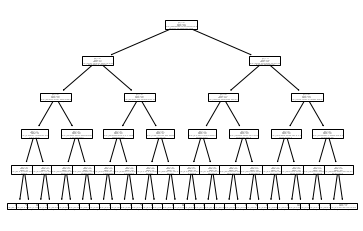

In [71]:
# Setup the Classifier
chess_tree_clf = DecisionTreeClassifier(random_state = 0, max_depth = 5, criterion = 'entropy')
chess_tree_clf = chess_tree_clf.fit(chess_features, chess_targets)
chess_pred = chess_tree_clf.predict(ch_test_features)

# Do Cross Validation on Tree

chess_score = cross_val_score(chess_tree_clf, chess_features, chess_targets, cv=10)

# Export Text Tree

chess_r = export_text(chess_tree_clf, feature_names = ['wk_file', 'wk_rank', 'wr_file', 'wr_rank','bk_file', 'bk_rank'])

# Build Tree Plot
chess_tree_plot = tree.plot_tree(chess_tree_clf)

chess_tree_clf2 = DecisionTreeClassifier(random_state = 0)
chess_tree_clf2 = chess_tree_clf2.fit(chess_features, chess_targets)

# Check accuracy
chess_accuracy = accuracy_score(ch_test_targets, chess_pred)

print("Chess Cross Validation Score: \n", chess_score)
print("")
print("Chess Export Text: \n", chess_r)
print("")

print("Accuracy: \n\t"+format(chess_accuracy,'.2f'))

In [0]:
# Set up Voting Data
"""
1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)
"""
voting_names = ['class', 'hi', 'wpcs', 'abr', 'pff','esa','rgs','astb','anc','mm','im','scc','es','srs','cm','dfe', 'eaas']
voting_file = ('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
voting = pd.read_csv(voting_file, header = None, na_values = "?", names = voting_names)

In [0]:
voting["hi"] = voting["hi"].astype('category')
voting["hi"] = voting["hi"].cat.codes
voting["wpcs"] = voting["wpcs"].astype('category')
voting["wpcs"] = voting["wpcs"].cat.codes
voting["abr"] = voting["abr"].astype('category')
voting["abr"] = voting["abr"].cat.codes
voting["pff"] = voting["pff"].astype('category')
voting["pff"] = voting["pff"].cat.codes
voting["esa"] = voting["esa"].astype('category')
voting["esa"] = voting["esa"].cat.codes
voting["rgs"] = voting["rgs"].astype('category')
voting["rgs"] = voting["rgs"].cat.codes
voting["astb"] = voting["astb"].astype('category')
voting["astb"] = voting["astb"].cat.codes
voting["anc"] = voting["anc"].astype('category')
voting["anc"] = voting["anc"].cat.codes
voting["mm"] = voting["mm"].astype('category')
voting["mm"] = voting["mm"].cat.codes
voting["im"] = voting["im"].astype('category')
voting["im"] = voting["im"].cat.codes
voting["scc"] = voting["scc"].astype('category')
voting["scc"] = voting["scc"].cat.codes
voting["es"] = voting["es"].astype('category')
voting["es"] = voting["es"].cat.codes
voting["srs"] = voting["srs"].astype('category')
voting["srs"] = voting["srs"].cat.codes
voting["cm"] = voting["cm"].astype('category')
voting["cm"] = voting["cm"].cat.codes
voting["dfe"] = voting["dfe"].astype('category')
voting["dfe"] = voting["dfe"].cat.codes
voting["eaas"] = voting["eaas"].astype('category')
voting["eaas"] = voting["eaas"].cat.codes

In [89]:
#randomize data
voting = voting.sample(frac=1)
voting

# split into features and targets
voting_features = voting[['hi', 'wpcs', 'abr', 'pff','esa','rgs','astb','anc','mm','im','scc','es','srs','cm','dfe', 'eaas']]
voting_targets = voting[['class']]

#randomize and split the samples into two groups.
#30% of the samples will be used for testing.
#the other 70% will be used for training.
voting_train_features, voting_test_features, voting_train_targets, voting_test_targets = train_test_split(voting_features, voting_targets, test_size = .50)

print ("chess train data shape: "+str(voting_train_features.shape+voting_train_targets.shape))
print ("chess test data shape: "+str(voting_test_features.shape+voting_test_targets.shape))

chess train data shape: (217, 16, 217, 1)
chess test data shape: (218, 16, 218, 1)


Chess Cross Validation Score: 
 [0.95454545 0.95454545 0.97727273 0.95454545 0.95454545 0.97674419
 0.97674419 0.95348837 0.95348837 0.90697674]

Chess Export Text: 
 |--- pff <= 0.50
|   |--- abr <= 0.50
|   |   |--- class: democrat
|   |--- abr >  0.50
|   |   |--- class: democrat
|--- pff >  0.50
|   |--- scc <= 0.50
|   |   |--- class: republican
|   |--- scc >  0.50
|   |   |--- class: republican


Accuracy: 
	0.95


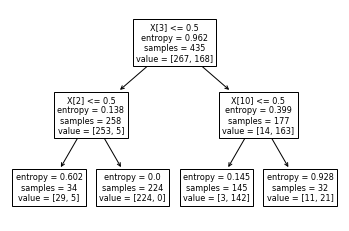

In [90]:
# Setup the Classifier
voting_tree_clf = DecisionTreeClassifier(random_state = 0, max_depth = 2, criterion = 'entropy')
voting_tree_clf = voting_tree_clf.fit(voting_features, voting_targets)
voting_pred = voting_tree_clf.predict(voting_test_features)

# Do Cross Validation on Tree

voting_score = cross_val_score(voting_tree_clf, voting_features, voting_targets, cv=10)

# Export Text Tree

voting_r = export_text(voting_tree_clf, feature_names = ['hi', 'wpcs', 'abr', 'pff','esa','rgs','astb','anc','mm','im','scc','es','srs','cm','dfe', 'eaas'])

# Build Tree Plot
voting_tree_plot = tree.plot_tree(voting_tree_clf)

# Check accuracy
voting_accuracy = accuracy_score(voting_test_targets, voting_pred)

print("Chess Cross Validation Score: \n", voting_score)
print("")
print("Chess Export Text: \n", voting_r)
print("")
print("Accuracy: \n\t"+format(voting_accuracy,'.2f'))